# Building an ML pipeline

In [53]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from pipeline import*

Task is to predict who will experience financial distress in the next two years.

## 1. Read data

In [2]:
creditDF = pd.read_csv("credit-data.csv")

## 2. Explore data

In [4]:
# snippet of the dataset
creditDF.head()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,98976,0,1.000000,55,60601,0,505.000000,0.0,2,0,0,0,0.0
1,98991,0,0.547745,71,60601,0,0.459565,15666.0,7,0,2,0,0.0
2,99012,0,0.044280,51,60601,0,0.014520,4200.0,5,0,0,0,0.0
3,99023,0,0.914249,55,60601,4,0.794875,9052.0,12,0,3,0,0.0
4,99027,0,0.026599,45,60601,0,0.049966,10406.0,4,0,0,0,2.0


In [5]:
# summary description of data
creditDF.describe()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,41016.000000,41016.000000,41016.00000,41016.000000,41016.000000,41016.000000,41016.000000,3.304200e+04,41016.000000,41016.000000,41016.000000,41016.000000,39979.000000
mean,115800.154598,0.161400,6.37587,51.683489,60623.824166,0.589233,331.458137,6.578996e+03,8.403477,0.419592,1.008801,0.371587,0.773231
std,28112.723511,0.367904,221.61895,14.746880,11.984357,5.205628,1296.109695,1.344683e+04,5.207324,5.190382,1.153826,5.169641,1.121269
min,22.000000,0.000000,0.00000,21.000000,60601.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,106539.750000,0.000000,0.03431,41.000000,60618.000000,0.000000,0.176375,3.333000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,119901.500000,0.000000,0.18973,51.000000,60625.000000,0.000000,0.369736,5.250000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,134698.250000,0.000000,0.66716,62.000000,60629.000000,0.000000,0.866471,8.055750e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,149999.000000,1.000000,22000.00000,109.000000,60644.000000,98.000000,106885.000000,1.794060e+06,56.000000,98.000000,32.000000,98.000000,13.000000


In [6]:
creditDF.loc[:, 'SeriousDlqin2yrs'].value_counts()

0    34396
1     6620
Name: SeriousDlqin2yrs, dtype: int64

In [7]:
# cross-tabs
pd.crosstab(creditDF.loc[:, 'NumberOfDependents'], creditDF.loc[:, "SeriousDlqin2yrs"])

SeriousDlqin2yrs,0,1
NumberOfDependents,,
0.0,20119,3384
1.0,5958,1253
2.0,4472,1067
3.0,2129,537
4.0,589,197
5.0,159,42
6.0,34,17
7.0,10,2
8.0,7,0


In [8]:
import matplotlib.pyplot as plt

In [9]:
creditDF.loc[:, 'SeriousDlqin2yrs'].value_counts()

0    34396
1     6620
Name: SeriousDlqin2yrs, dtype: int64

In [10]:
np.polyfit(creditDF['age'], creditDF['MonthlyIncome'], deg = 2)

array([nan, nan, nan])

In [14]:
creditDF.groupby('SeriousDlqin2yrs').describe()

DebtRatio                                                    \
                     count        mean          std  min       25%       50%   
SeriousDlqin2yrs                                                               
0                  34396.0  339.135574  1301.472391  0.0  0.172103  0.359875   
1                   6620.0  291.567939  1267.229353  0.0  0.196992  0.426882   

                                     MonthlyIncome                ...     \
                       75%       max         count         mean   ...      
SeriousDlqin2yrs                                                  ...      
0                 0.860747  106885.0       27514.0  6776.748201   ...      
1                 0.895111   38793.0        5528.0  5594.740774   ...      

                   age         zipcode                                    \
                   75%    max    count          mean        std      min   
SeriousDlqin2yrs                                                           
0                 63.0  109.0  34396.0  60624.061025  12.119007  60601.0   
1                 54.0   99.0   6620.0  60622.593505  11.179233  60601.0   

                                                      
                      25%      50%      75%      max  
SeriousDlqin2yrs                                      
0                 60618.0  60625.0  60629.0  60644.0  
1                 60618.0  60625.0  60629.0  60637.0  

[2 rows x 96 columns]

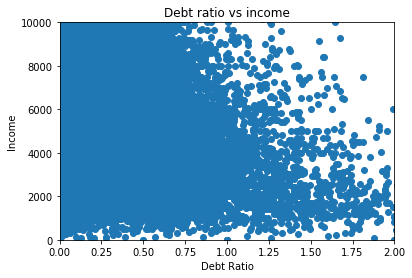

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = creditDF.loc[:,"DebtRatio"]
y = creditDF.loc[:,"MonthlyIncome"]
ax.scatter(x,y, cmap = creditDF.loc[:, 'SeriousDlqin2yrs'])
ax.set(title = "Debt ratio vs income",
      ylabel = "Income",
      xlabel = "Debt Ratio",
      xlim = [0,2],
      ylim = [0,10000])
plt.show()

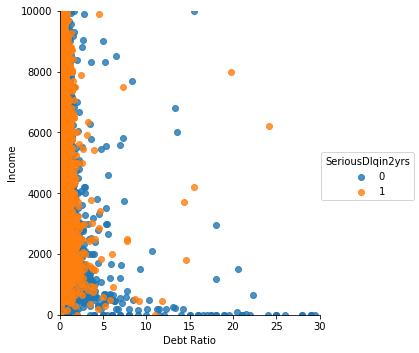

In [17]:
g = sns.lmplot(x='DebtRatio', y='MonthlyIncome', data=creditDF,
           fit_reg=False, 
           hue='SeriousDlqin2yrs')
g = (g.set_axis_labels("Debt Ratio", "Income").set(xlim =(0,30), ylim = (0, 10000)))
plt.show()

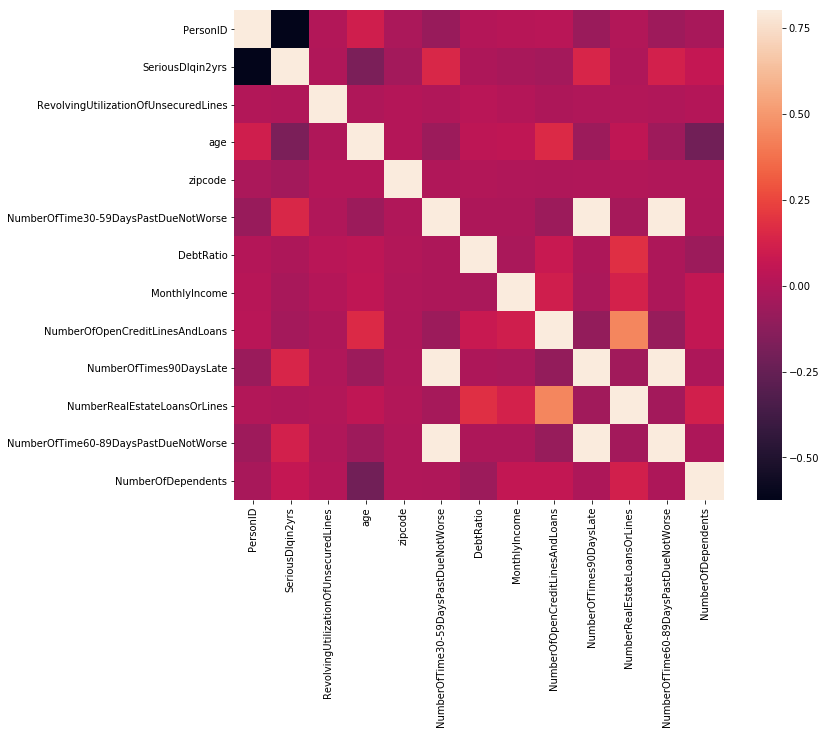

In [18]:
corrmat = creditDF.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

/Users/xiangyu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


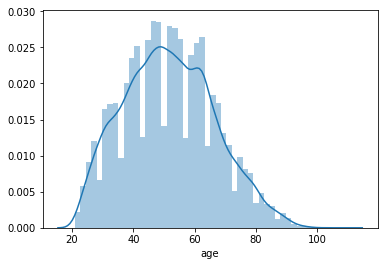

In [19]:
basic_hist(creditDF, 'age')

## Part III: Pre-processing data

In [20]:
creditDF.isna().sum().sort_values(ascending=False)

MonthlyIncome                           7974
NumberOfDependents                      1037
NumberOfTime60-89DaysPastDueNotWorse       0
NumberRealEstateLoansOrLines               0
NumberOfTimes90DaysLate                    0
NumberOfOpenCreditLinesAndLoans            0
DebtRatio                                  0
NumberOfTime30-59DaysPastDueNotWorse       0
zipcode                                    0
age                                        0
RevolvingUtilizationOfUnsecuredLines       0
SeriousDlqin2yrs                           0
PersonID                                   0
dtype: int64

In [21]:
df = creditDF.fillna(creditDF.mean())

## Part IV: Generating features/predictors

In [22]:
df['age_brackets'] =pd.cut(df['age'], [-np.inf,25,30,35,40,45,50,55,60, 65, 70, 75, 80, 85, 90, np.inf], right = False)

In [23]:
df.columns

Index(['PersonID', 'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines',
       'age', 'zipcode', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents',
       'age_brackets'],
      dtype='object')

In [24]:
def dummy_and_merge(df, x):
	dummy = pd.get_dummies(df[x])
	return pd.concat([df, dummy],axis = 1)

In [25]:
df2 = dummy_and_merge(df, 'zipcode')

## Part V: Build classifier

I'll try a logistic regression classifier this time.

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

/Users/xiangyu/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [43]:
df3 = df2.drop(["age_brackets", "zipcode"], axis = 1)

In [44]:
personDF = df3['PersonID']
X = df3.drop(['PersonID', 'SeriousDlqin2yrs'], axis=1)
Y = df3['SeriousDlqin2yrs']
test_size = 0.3 # you can adjust this
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size)

In [46]:
clf = LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Part VI: Evaluate classifier

In [48]:
def evaluateAccuracy(clf,predictDF, truthDF):
    correct_pred = 0
    pred_x = clf.predict(predictDF)
    for i in range(0,len(predictDF)):
        if pred_x[i] == truthDF.iloc[i]:
            correct_pred +=1
    return (correct_pred/len(predictDF))

In [50]:
evaluateAccuracy(clf, x_test, y_test)

0.8519301097114994